c:\Users\dhaks\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5442 - loss: 1.6643 - val_accuracy: 0.8292 - val_loss: 0.7969
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8346 - loss: 0.7281 - val_accuracy: 0.8811 - val_loss: 0.5059
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8745 - loss: 0.4973 - val_accuracy: 0.8970 - val_loss: 0.4056
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8909 - loss: 0.4141 - val_accuracy: 0.9058 - val_loss: 0.3592
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9022 - loss: 0.3643 - val_accuracy: 0.9101 - val_loss: 0.3331
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9068 - loss: 0.3429 - val_accuracy: 0.9133 - val_loss: 0.3178
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9091 - loss: 0.3278 - val_accuracy: 0.9156 - val_loss: 0.3073
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9130 - loss: 0.3134 - val_accuracy: 0.9175 - val_loss:

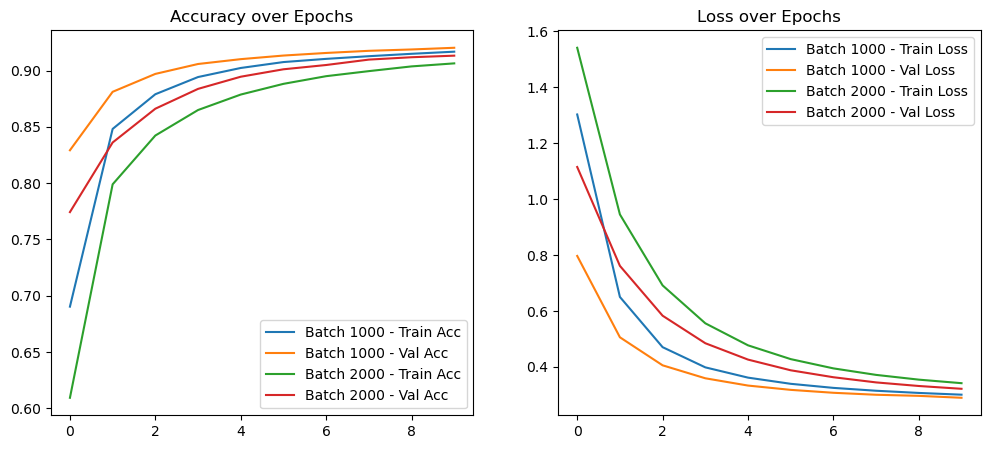

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

def create_model():
    model = keras.Sequential([
        keras.layers.Dense(10, activation='softmax', input_shape=(784,))
    ])
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_1000 = create_model()
history_1000 = model_1000.fit(x_train, y_train, epochs=10, batch_size=1000, validation_data=(x_test, y_test))

model_2000 = create_model()
history_2000 = model_2000.fit(x_train, y_train, epochs=10, batch_size=2000, validation_data=(x_test, y_test))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_1000.history['accuracy'], label='Batch 1000 - Train Acc')
plt.plot(history_1000.history['val_accuracy'], label='Batch 1000 - Val Acc')
plt.plot(history_2000.history['accuracy'], label='Batch 2000 - Train Acc')
plt.plot(history_2000.history['val_accuracy'], label='Batch 2000 - Val Acc')
plt.legend()
plt.title("Accuracy over Epochs")

plt.subplot(1, 2, 2)
plt.plot(history_1000.history['loss'], label='Batch 1000 - Train Loss')
plt.plot(history_1000.history['val_loss'], label='Batch 1000 - Val Loss')
plt.plot(history_2000.history['loss'], label='Batch 2000 - Train Loss')
plt.plot(history_2000.history['val_loss'], label='Batch 2000 - Val Loss')
plt.legend()
plt.title("Loss over Epochs")

plt.show()
